In [2]:
import torch 
import torch.nn as nn

## Mean Absolute Error (L1 Loss Function)

When could it be used?

Regression problems, especially when the distribution of the target variable has outliers, such as small or big values that are a great distance from the mean value. It is considered to be more robust to outliers.

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

/Users/pranavjha/opt/anaconda3/envs/pytorchenv/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)

In [9]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [10]:
class PyTorch_NN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(PyTorch_NN, self).__init__()
        self.input_layer = nn.Linear(input_dim, 128)
        self.hidden_layer = nn.Linear(128, 64)
        self.output_layer = nn.Linear(64, output_dim)

    def forward(self, x):
        x = F.relu(self.input_layer(x))
        x = F.relu(self.hidden_layer(x))
        x = F.softmax(self.output_layer(x), dim=1)
        return x

In [11]:
def get_accuracy(pred_arr,original_arr):
    pred_arr = pred_arr.detach().numpy()
    original_arr = original_arr.numpy()
    final_pred= []

    for i in range(len(pred_arr)):
        final_pred.append(np.argmax(pred_arr[i]))
    final_pred = np.array(final_pred)
    count = 0

    for i in range(len(original_arr)):
        if final_pred[i] == original_arr[i]:
            count+=1
    return count/len(final_pred)*100

def train_network(model, optimizer, criterion, X_train, y_train, X_test, y_test, num_epochs):
    train_loss=[]
    train_accuracy=[]
    test_accuracy=[]

    for epoch in range(num_epochs):

        #forward feed
        output_train = model(X_train)

        train_accuracy.append(get_accuracy(output_train, y_train))

        #calculate the loss
        loss = criterion(output_train, y_train)
        train_loss.append(loss.item())

        #clear out the gradients from the last step loss.backward()
        optimizer.zero_grad()

        #backward propagation: calculate gradients
        loss.backward()

        #update the weights
        optimizer.step()

        with torch.no_grad():
            output_test = model(X_test)
            test_accuracy.append(get_accuracy(output_test, y_test))

        if (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss.item():.4f}, Train Accuracy: {sum(train_accuracy)/len(train_accuracy):.2f}, Test Accuracy: {sum(test_accuracy)/len(test_accuracy):.2f}")

    return train_loss, train_accuracy, test_accuracy

In [12]:
input_dim  = 4
output_dim = 3
learning_rate = 0.01

model = PyTorch_NN(input_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [13]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

train_loss, train_accuracy, test_accuracy = train_network(model=model, optimizer=optimizer, criterion=criterion, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, num_epochs=100)

Epoch 5/100, Train Loss: 0.7429, Train Accuracy: 73.83, Test Accuracy: 82.00
Epoch 10/100, Train Loss: 0.6628, Train Accuracy: 80.33, Test Accuracy: 83.67
Epoch 15/100, Train Loss: 0.6004, Train Accuracy: 84.83, Test Accuracy: 86.67
Epoch 20/100, Train Loss: 0.5832, Train Accuracy: 87.75, Test Accuracy: 88.67
Epoch 25/100, Train Loss: 0.5705, Train Accuracy: 89.77, Test Accuracy: 89.87
Epoch 30/100, Train Loss: 0.5666, Train Accuracy: 91.31, Test Accuracy: 90.44
Epoch 35/100, Train Loss: 0.5642, Train Accuracy: 92.43, Test Accuracy: 90.86
Epoch 40/100, Train Loss: 0.5626, Train Accuracy: 93.27, Test Accuracy: 91.17
Epoch 45/100, Train Loss: 0.5618, Train Accuracy: 93.93, Test Accuracy: 91.41
Epoch 50/100, Train Loss: 0.5613, Train Accuracy: 94.45, Test Accuracy: 91.60
Epoch 55/100, Train Loss: 0.5609, Train Accuracy: 94.88, Test Accuracy: 91.76
Epoch 60/100, Train Loss: 0.5607, Train Accuracy: 95.24, Test Accuracy: 91.89
Epoch 65/100, Train Loss: 0.5605, Train Accuracy: 95.54, Test Acc

Text(0.5, 0, 'epochs')

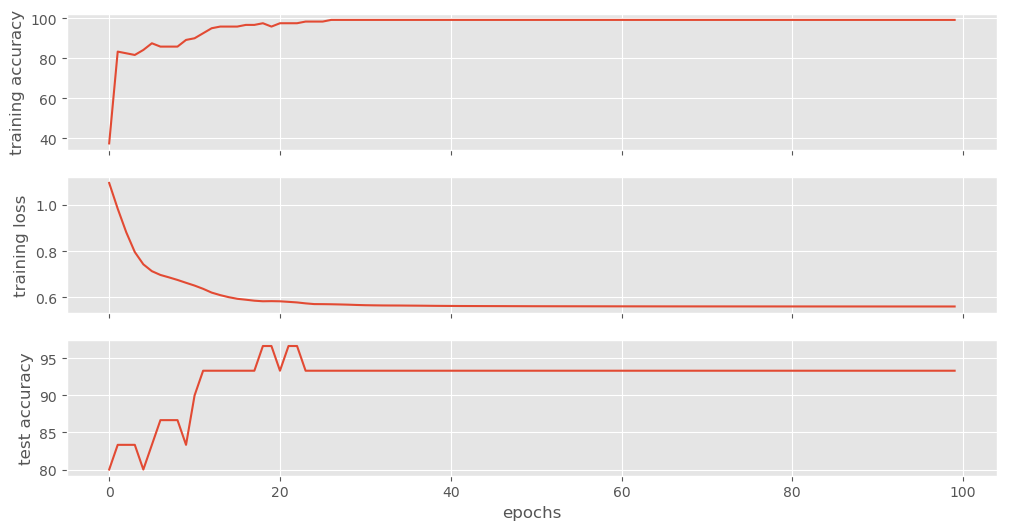

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12, 6), sharex=True)

ax1.plot(train_accuracy)
ax1.set_ylabel("training accuracy")

ax2.plot(train_loss)
ax2.set_ylabel("training loss")

ax3.plot(test_accuracy)
ax3.set_ylabel("test accuracy")

ax3.set_xlabel("epochs")

In [1]:
import neptune

run = neptune.init_run()

/Users/pranavjha/opt/anaconda3/envs/pytorchenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: NeptuneWarning: To avoid unintended consumption of logging hours during interactive sessions, the following monitoring options are disabled unless set to 'True' when initializing the run: 'capture_stdout', 'capture_stderr', and 'capture_hardware_metrics'.
  This is separate from the ipykernel package so we can avoid doing imports until


NeptuneMissingApiTokenException: 
[95m
----NeptuneMissingApiTokenException-------------------------------------------
[0m
The Neptune client couldn't find your API token.

You can get it here:
    - https://app.neptune.ai/get_my_api_token

There are two options to add it:
    - specify it in your code
    - set an environment variable in your operating system.

[94mCODE[0m
Pass the token to the [1minit_run()[0m function via the [1mapi_token[0m argument:
    [96mneptune.init_run(project='WORKSPACE_NAME/PROJECT_NAME', api_token='YOUR_API_TOKEN')[0m

[94mENVIRONMENT VARIABLE[0m [92m(Recommended option)[0m
or export or set an environment variable depending on your operating system:

    [92mLinux/Unix[0m
    In your terminal run:
        [95mexport NEPTUNE_API_TOKEN="YOUR_API_TOKEN"[0m

    [92mWindows[0m
    In your CMD run:
        [95mset NEPTUNE_API_TOKEN="YOUR_API_TOKEN"[0m

and skip the [1mapi_token[0m argument of the [1minit_run()[0m function:
    [96mneptune.init_run(project='WORKSPACE_NAME/PROJECT_NAME')[0m

You may also want to check the following docs pages:
    - https://docs.neptune.ai/setup/setting_api_token/

[92mNeed help?[0m-> https://docs.neptune.ai/getting_help
